## 为什么使用测试数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100) # 添加正太分布的噪声

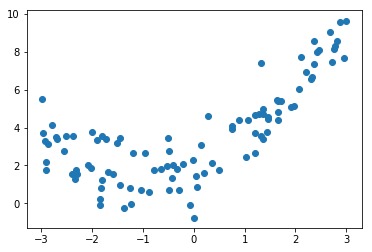

In [3]:
plt.scatter(x, y)
plt.show()

## 过拟合

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler # 为什么需要数据归一化的

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ])

In [7]:
# 重新引入新的评价函数
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

from sklearn.metrics import mean_squared_error
y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6875653386073417

In [8]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

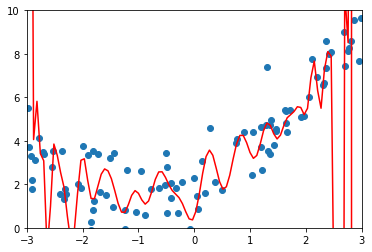

In [9]:
plt.scatter(x, y)
plt.plot(X_plot[:, 0], y_plot, color='r')
plt.axis([-3, 3, 0, 10])
plt.show()

模型的泛化能力差

### train_test_split的意义

In [11]:
from sklearn.model_selection import train_test_split # 模型层面
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [12]:
lin_reg = LinearRegression() # 线性回归
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict) # 真实值在前

2.2199965269396573

In [18]:
poly2_reg = PolynomialRegression(degree=2)
# poly2_reg.fit(X, y)
poly2_reg.fit(X_train, y_train)
# y2_predict = poly2_reg.predict(X)
# mean_squared_error(y, y2_predict)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict) # 发现泛化能力更好了

0.8035641056297901

In [19]:
poly10_reg = PolynomialRegression(degree=10)
# poly10_reg.fit(X, y)
poly10_reg.fit(X_train, y_train)
# y10_predict = poly10_reg.predict(X)
# mean_squared_error(y, y10_predict)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict) # 发现泛化能力更好了

0.9212930722150686

In [17]:
poly100_reg = PolynomialRegression(degree=100)
# poly100_reg.fit(X, y)
poly100_reg.fit(X_train, y_train)
# y100_predict = poly100_reg.predict(X)
# mean_squared_error(y, y100_predict)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict) # 发现泛化能力更好了

14075780270.824253